In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
iris = load_iris()
df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
df['species'] = iris.target

print(df.info())
print(iris.target)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


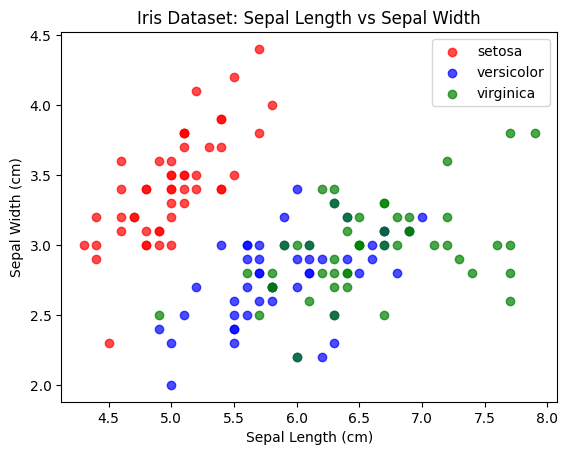

In [3]:
for species, color in zip([0, 1, 2], ['red', 'blue', 'green']):
    subset = df[df['species'] == species]  # Select only rows of the current species
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], 
                label=iris.target_names[species], color=color, alpha=0.7)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Iris Dataset: Sepal Length vs Sepal Width")
plt.legend()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
x = iris.data
y = iris.target
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size= 0.2, random_state=42)

def euclideanDist(pt1, pt2):
    return np.sqrt(np.sum((np.array(pt1)-np.array(pt2))**2))
test_point = xTest[0]
train_point = xTrain[0]
distance = euclideanDist(test_point, train_point)
print("Distance is:", distance)

Distance is: 4.192851058647326


In [17]:
from collections import Counter
def getKnear(xTrain, yTrain, test_point, k):
    distances = []
    for i in range(len(xTrain)):
        dist = euclideanDist(xTrain[i],test_point)
        distances.append((dist, yTrain[i]))
    distances.sort(key=lambda  x: x[0])
    kNeighbours = distances[:k]
    return kNeighbours

def predictClass(kNeighbours):
    labels = [label for _, label in kNeighbours]
    labelCount = Counter(labels)
    predLabel = labelCount.most_common(1)[0][0]
    return predLabel

def labelToFlower(label):
    return iris.target_names[label]

k = 3
kNeighbours = getKnear(xTrain, yTrain, test_point, k)
print("k nearest neighbours: ", kNeighbours)
predictedFlower = predictClass(kNeighbours)
print("The flower closest is ", labelToFlower(predictedFlower))


k nearest neighbours:  [(np.float64(0.22360679774997896), np.int64(1)), (np.float64(0.30000000000000027), np.int64(1)), (np.float64(0.43588989435406783), np.int64(1))]
The flower closest is  versicolor


In [19]:
def testKKN(xTest,xTrain,yTest,yTrain, k):
    correctPred = 0
    
    for i in range(len(xTest)):
        kNeighbours = getKnear(xTrain, yTrain, xTest[i], k)
        predictedFlowerlabel = predictClass(kNeighbours)
        if(predictedFlowerlabel) == yTest[i]:
            correctPred +=1
    accuracy = (correctPred/len(xTest))*100
    return accuracy

accuracy = testKKN(xTest,xTrain,yTest,yTrain, k)
print("Accuracy = ", accuracy)

Accuracy =  100.0
